In [1]:
##Data Collection
import pandas as pd
dataset_train = pd.read_csv('stock market.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#head vale view
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
import numpy as np
#pandas below 0.24+
print (dataset_train.columns.values.tolist())
#pandas above 0.24+
print (dataset_train.columns.to_numpy().tolist())

['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']
['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']


In [7]:
df1=dataset_train.reset_index()['Close']

In [8]:
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


Text(0.5, 0, 'X axis')

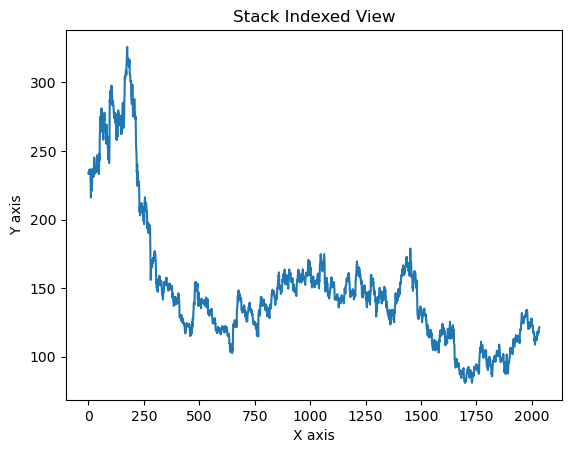

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title('Stack Indexed View')
plt.ylabel('Y axis')
plt.xlabel('X axis')

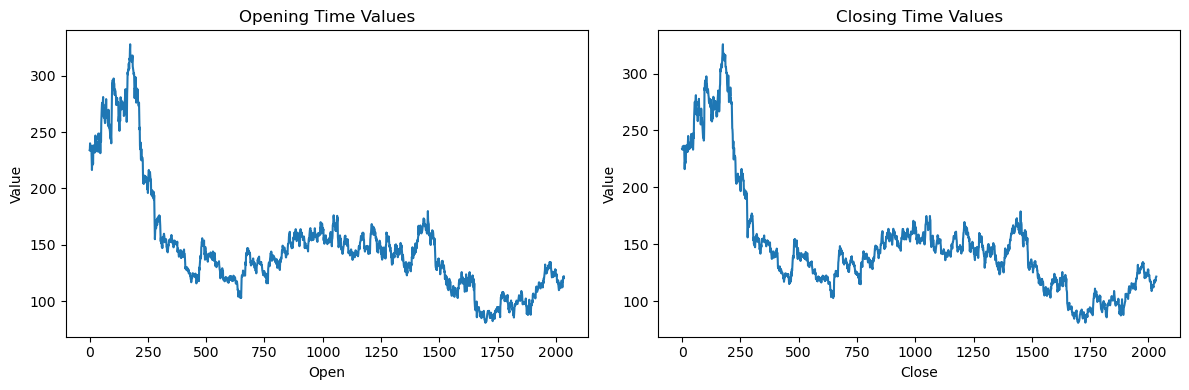

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the "Open" column
axes[0].plot(dataset_train["Open"])
axes[0].set_title("Opening Time Values")
axes[0].set_xlabel("Open")
axes[0].set_ylabel("Value")

# Plot the "Close" column
axes[1].plot(dataset_train["Close"])
axes[1].set_title("Closing Time Values")
axes[1].set_xlabel("Close")
axes[1].set_ylabel("Value")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# LSTM are sensitive to the scale of the data

In [10]:
#so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [12]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
print(training_size)
print(test_size)
print(train_data,test_data)

1322
713
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.25347222]
 [0.26041667]
 [0.2563317 ]] [[0.24652778]
 [0.23611111]
 [0.25204248]
 [0.25919118]
 [0.25776144]
 [0.2681781 ]
 [0.25449346]
 [0.27103758]
 [0.24530229]
 [0.26756536]
 [0.27267157]
 [0.26633987]
 [0.27410131]
 [0.28615196]
 [0.27818627]
 [0.27205882]
 [0.27124183]
 [0.27798203]
 [0.27083333]
 [0.25857843]
 [0.24285131]
 [0.2250817 ]
 [0.23447712]
 [0.24346405]
 [0.23611111]
 [0.22937092]
 [0.21527778]
 [0.20976307]
 [0.20751634]
 [0.2060866 ]
 [0.20445261]
 [0.20098039]
 [0.21180556]
 [0.19301471]
 [0.18974673]
 [0.20302288]
 [0.21752451]
 [0.20629085]
 [0.19158497]
 [0.17381536]
 [0.17401961]
 [0.18361928]
 [0.17830882]
 [0.19362745]
 [0.20098039]
 [0.20486111]
 [0.21425654]
 [0.21813725]
 [0.21466503]
 [0.21343954]
 [0.21160131]
 [0.21711601]
 [0.20710784]
 [0.2005719 ]
 [0.20874183]
 [0.18647876]
 [0.19199346]
 [0.1807598 ]
 [0.20935458]
 [0.20792484]
 [0.21425654]
 [0.23366013]
 [0.23304739]
 [0.26184641]
 [0.2

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
     

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 159ms/step - loss: 0.0248 - val_loss: 0.0034
Epoch 2/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0017 - val_loss: 8.9195e-04
Epoch 4/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0017 - val_loss: 9.9056e-04
Epoch 5/100
20/20 [==============================] - 2s 119ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 2s 126ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 3s 129ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 3s 144ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 3s 158ms/step - loss: 0.0012 - val_loss: 8.9070e-04
Epoch 10/100
20/20 [==============================] - 3s 131ms/step - loss: 0.0

In [22]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [23]:
import matplotlib.pyplot as plt

In [24]:
len(df1)


2035

In [25]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 0s 22ms/step


In [26]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

166.31370742043964

In [28]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

116.092549295826

In [29]:
#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

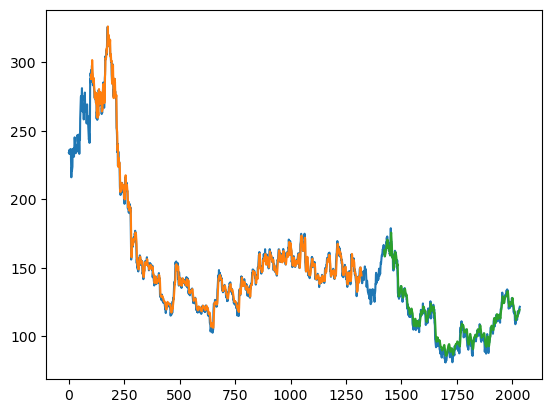

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [30]:
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")